In [6]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/a3426/Desktop/GC/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [8]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:

y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
X=df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [12]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [14]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.78125
[[119  11]
 [ 31  31]]


In [19]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7916666666666666
[[116  14]
 [ 26  36]]


In [16]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.6875
[[111  19]
 [ 41  21]]


In [17]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.6875
[[111  19]
 [ 41  21]]


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.7760416666666666
[[114  16]
 [ 27  35]]


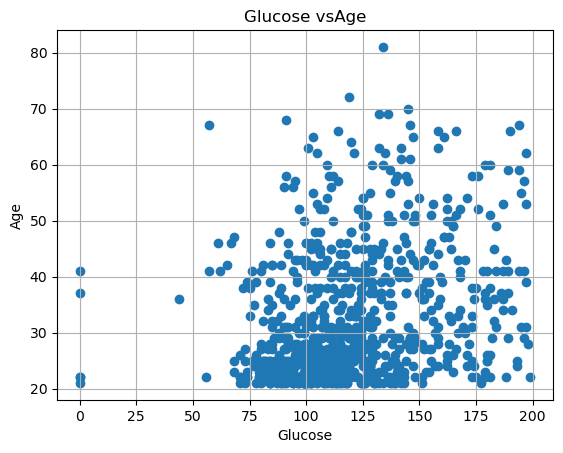

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# 산점도 그리기
plt.scatter(df['Glucose'], df['Age'])
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title('Glucose vsAge')
plt.grid(True)
plt.show()

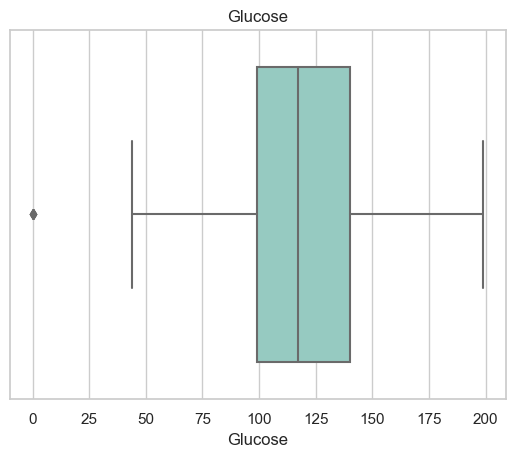

In [26]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Glucose", data=df, palette="Set3")
plt.title("Glucose")
plt.show()

Text(0.5, 1.0, 'Outcome')

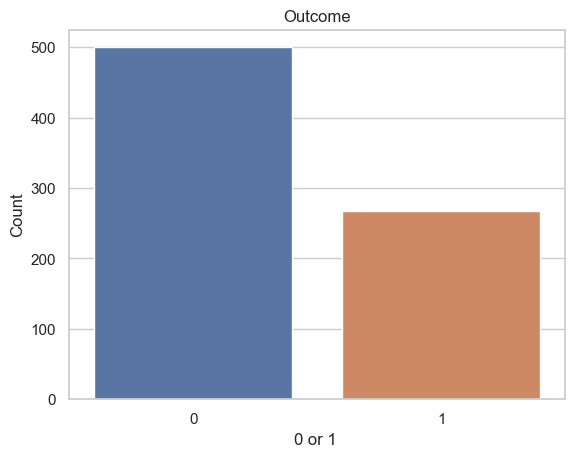

In [29]:
# 레이블 갯수 확인 (그래프)
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data = df, x="Outcome")
plt.xlabel("0 or 1 ")
plt.ylabel("Count")
plt.title("Outcome")

In [30]:
import pandas as pd

# 샘플 데이터프레임 생성


# 각 열의 평균과 표준편차를 계산
mean = df.mean()
std = df.std()

# 표준화 수행
standardized_df = (df - mean) / std

print("표준화된 데이터프레임:")
print(standardized_df)

표준화된 데이터프레임:
              Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
Pregnancies                                                               
6            0.847771       0.149543       0.906679 -0.692439  0.203880   
1           -1.122665      -0.160441       0.530556 -0.692439 -0.683976   
8            1.942458      -0.263769      -1.287373 -0.692439 -1.102537   
1           -0.997558      -0.160441       0.154433  0.123221 -0.493721   
0            0.503727      -1.503707       0.906679  0.765337  1.408828   
...               ...            ...            ...       ...       ...   
10          -0.622237       0.356200       1.721613  0.869464  0.115094   
2            0.034575       0.046215       0.405181 -0.692439  0.609757   
5            0.003299       0.149543       0.154433  0.279412 -0.734711   
1            0.159683      -0.470426      -1.287373 -0.692439 -0.240048   
1           -0.872451       0.046215       0.655930 -0.692439 -0.201997   

           

In [31]:
import pandas as pd

# 각 열의 최소값과 최대값을 계산
min_val = df.min()
max_val = df.max()

# 최소-최대 스케일링 수행
scaled_df = (df - min_val) / (max_val - min_val)

print("최소-최대 스케일링된 데이터프레임:")
print(scaled_df)

최소-최대 스케일링된 데이터프레임:
              Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
Pregnancies                                                               
6            0.743719       0.590164       0.353535  0.000000  0.500745   
1            0.427136       0.540984       0.292929  0.000000  0.396423   
8            0.919598       0.524590       0.000000  0.000000  0.347243   
1            0.447236       0.540984       0.232323  0.111111  0.418778   
0            0.688442       0.327869       0.353535  0.198582  0.642325   
...               ...            ...            ...       ...       ...   
10           0.507538       0.622951       0.484848  0.212766  0.490313   
2            0.613065       0.573770       0.272727  0.000000  0.548435   
5            0.608040       0.590164       0.232323  0.132388  0.390462   
1            0.633166       0.491803       0.000000  0.000000  0.448584   
1            0.467337       0.573770       0.313131  0.000000  0.453055   

    